In [4]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import seaborn as sns
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

from sklearn.model_selection import train_test_split

import warnings 
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('C:\\Users\\Vignesh Prakash\\Documents\\Great Learning\\Class\\SLC\\telco_chrun_encoded.csv')
df=df.sample(frac=0.5,random_state=3)
df.head()

,gender,senior,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,avg_monthly_charges,internet_service-fiber_optic,internet_service-no,contract-one_year,contract-two_year,payment_method-credit_card_auto,payment_method-electronic_check,payment_method-mailed_check
5571,0,0,0,0,48,1,0,0,0,0,0,0,0,0,19.95,1004.50,0,20.927083,0,1,1,0,0,0,0
3432,0,0,1,0,18,1,1,0,0,0,0,1,1,1,94.70,1687.95,1,93.775000,1,0,0,0,0,1,0
2170,1,0,0,0,30,1,0,0,0,0,1,1,0,0,85.15,2555.90,1,85.196667,1,0,0,0,0,1,0
4230,0,0,0,0,5,1,0,0,0,1,0,1,1,1,70.05,346.40,1,69.280000,0,0,0,0,0,1,0
510,0,0,0,0,61,1,1,1,0,1,0,1,1,1,106.45,6300.15,0,103.281148,1,0,0,0,0,1,0


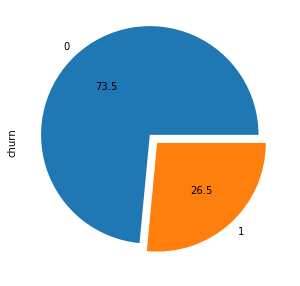

In [6]:
plt.figure(figsize=(5,5))
df.churn.value_counts().plot(kind='pie',autopct='%1.1f',explode=(0.1,0))

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3516 entries, 5571 to 4322
Data columns (total 25 columns):
gender                             3516 non-null int64
senior                             3516 non-null int64
partner                            3516 non-null int64
dependents                         3516 non-null int64
tenure                             3516 non-null int64
phone_service                      3516 non-null int64
multiple_lines                     3516 non-null int64
online_security                    3516 non-null int64
online_backup                      3516 non-null int64
device_protection                  3516 non-null int64
tech_support                       3516 non-null int64
streaming_tv                       3516 non-null int64
streaming_movies                   3516 non-null int64
paperless_billing                  3516 non-null int64
monthly_charges                    3516 non-null float64
total_charges                      3516 non-null float64
churn 

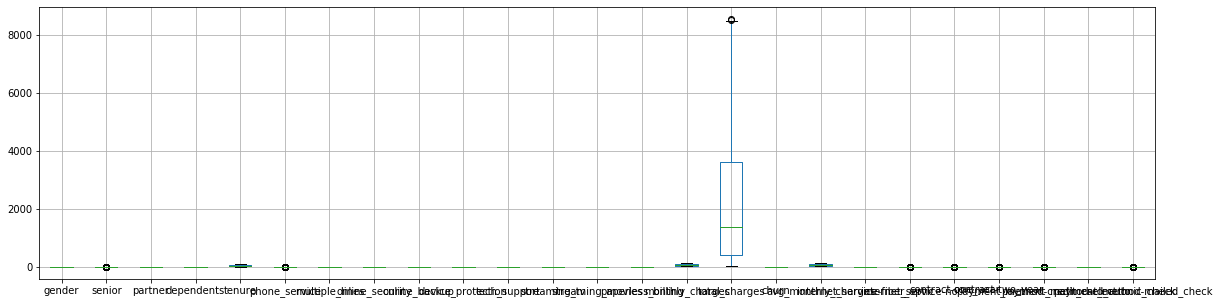

In [8]:
plt.figure(figsize=(20,5))
df.boxplot()

In [9]:
df=df.sample(frac=1,random_state=3)
y=df['churn']
X=df.drop('churn',axis=1)

In [10]:
df['churn'].value_counts()

0    2584
1     932
Name: churn, dtype: int64

In [11]:
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,log_loss,f1_score

#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

const                              3.500872e-05
gender                             9.145529e-02
senior                             1.966828e-01
partner                            3.730657e-01
dependents                         1.635809e-02
tenure                             2.803784e-03
phone_service                      2.014836e-01
multiple_lines                     6.925736e-03
online_security                    6.608071e-01
online_backup                      5.772939e-01
device_protection                  5.884974e-01
tech_support                       6.607235e-01
streaming_tv                       2.640907e-02
streaming_movies                   1.222953e-02
paperless_billing                  6.998033e-03
monthly_charges                    2.975660e-02
total_charges                      5.650639e-05
avg_monthly_charges                6.552978e-02
internet_service-fiber_optic       7.709282e-03
internet_service-no                7.046006e-03
contract-one_year                  4.412

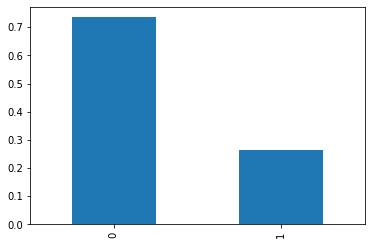

In [12]:
df['churn'].value_counts(normalize=True).plot.bar()

In [14]:
df= df.sample(frac=1,random_state=3)
y=df['churn']
X= df.drop(['churn'],axis=1)

# Building predictive algorithm using random forest

In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)

In [19]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
Xs=ss.fit_transform(X)

X_trains=ss.fit_transform(X_train)
X_tests=ss.transform(X_test)

Confusion Matrix - Train: 
 [[1806    1]
 [   1  653]]


Overall Accuracy - Train:  0.9991873222267371
AUC - Train:  0.9999983076347673


Confusion Matrix - Test: 
 [[698  79]
 [138 140]]


Overall Accuracy - Test:  0.7943127962085308
AUC - Test:  0.8266344453394812


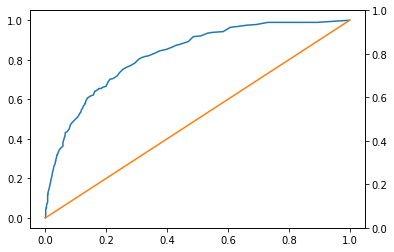

In [20]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)

rfc.fit(X_trains,y_train)
y_train_pred =rfc.predict(X_trains)
y_train_prob = rfc.predict_proba(X_trains)[:,1]

print('Confusion Matrix - Train: \n', confusion_matrix(y_train, y_train_pred))
print('\n')
print('Overall Accuracy - Train: ', accuracy_score(y_train, y_train_pred))
print('AUC - Train: ', roc_auc_score(y_train, y_train_prob))

y_test_pred = rfc.predict(X_tests)
y_test_prob = rfc.predict_proba(X_tests)[:,1]

print('\n')
print('Confusion Matrix - Test: \n', confusion_matrix(y_test, y_test_pred))
print('\n')
print('Overall Accuracy - Test: ', accuracy_score(y_test, y_test_pred))
print('AUC - Test: ', roc_auc_score(y_test, y_test_prob))

fpr,tpr,th=roc_curve(y_test, y_test_prob)
fig,ax=plt.subplots()
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
ax1=ax.twinx()

# Hyperparameter Tuning of random forest

In [21]:
X_trains.shape

(2461, 24)

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

rfc=RandomForestClassifier(n_estimators=100)
params={'n_estimators':sp_randint(50,200),
        'max_features':sp_randint(1,14),
        'max_depth': sp_randint(2,10),
        'min_samples_split':sp_randint(2,20),
        'min_samples_leaf':sp_randint(1,20),
        'criterion':['gini','entropy']}

rsearch_rfc=RandomizedSearchCV(rfc,param_distributions=params,n_iter=200,cv=3,scoring='roc_auc',random_state=3,n_jobs=-1,return_train_score=True)

rsearch_rfc.fit(Xs,y)


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000158734CEDC8>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000158792EBFC8>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000158793221C8>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000015879322308>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001587924AAC8>},
                   random_state=3, return_train_score=True, scoring='roc_auc')

In [23]:
rsearch_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 2,
 'min_samples_leaf': 15,
 'min_samples_split': 8,
 'n_estimators': 186}

In [24]:
pd.DataFrame(rsearch_rfc.cv_results_).head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.231616,0.004878,0.018302,0.003555,gini,2,10,4,10,50,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.817633,0.825030,0.840130,0.827598,0.009362,195,0.840090,0.835349,0.837549,0.837663,0.001937
1,1.022316,0.065620,0.094697,0.025770,entropy,7,4,11,13,188,"{'criterion': 'entropy', 'max_depth': 7, 'max_...",0.836078,0.838745,0.854766,0.843196,0.008253,22,0.893148,0.889569,0.886362,0.889693,0.002772


Confusion Matrix - Train: 
 [[1732   75]
 [ 386  268]]


Overall Accuracy - Train:  0.8126777732629012
AUC - Train:  0.8806950205537757


Confusion Matrix - Test: 
 [[733  44]
 [178 100]]


Overall Accuracy - Test:  0.7895734597156399
AUC - Test:  0.8487611455237354


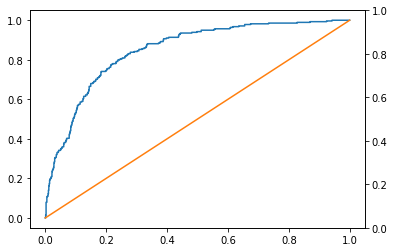

In [25]:
rfc=RandomForestClassifier(**rsearch_rfc.best_params_,random_state=3)

rfc.fit(X_trains,y_train)
y_train_pred =rfc.predict(X_trains)
y_train_prob = rfc.predict_proba(X_trains)[:,1]

print('Confusion Matrix - Train: \n', confusion_matrix(y_train, y_train_pred))
print('\n')
print('Overall Accuracy - Train: ', accuracy_score(y_train, y_train_pred))
print('AUC - Train: ', roc_auc_score(y_train, y_train_prob))

y_test_pred = rfc.predict(X_tests)
y_test_prob = rfc.predict_proba(X_tests)[:,1]

print('\n')
print('Confusion Matrix - Test: \n', confusion_matrix(y_test, y_test_pred))
print('\n')
print('Overall Accuracy - Test: ', accuracy_score(y_test, y_test_pred))
print('AUC - Test: ', roc_auc_score(y_test, y_test_prob))


fpr,tpr,th=roc_curve(y_test, y_test_prob)
fig,ax=plt.subplots()
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
ax1=ax.twinx()

In [27]:
imp=pd.DataFrame(rfc.feature_importances_,index=X.columns,columns=['imp'])
imp=imp.sort_values(by='imp',ascending=False)
imp

,imp
tenure,0.171255
total_charges,0.124441
contract-two_year,0.106603
avg_monthly_charges,0.087873
internet_service-fiber_optic,0.086306
monthly_charges,0.086263
payment_method-electronic_check,0.050262
internet_service-no,0.040605
online_security,0.034937
contract-one_year,0.029304


##### Importance denotes by what percent it affects the drop in the model, it can be used as a feature selection, which ever is a perfect '0' it says that it dosent affect the model and hence they can be removed.

# KNN Algorithm

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from scipy.stats import randint as sp_randint

knn=KNeighborsClassifier()

params={'n_neighbors':sp_randint(1,20),'p':sp_randint(1,5)}

rsearch_knn=RandomizedSearchCV(knn,param_distributions=params,cv=3,n_iter=50,return_train_score=True,random_state=3,n_jobs=-1)
rsearch_knn.fit(Xs,y)

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001587E770A08>,
                                        'p': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001587E6D8588>},
                   random_state=3, return_train_score=True)

In [29]:
rsearch_knn.best_params_

{'n_neighbors': 18, 'p': 1}

Confusion Matrix - Train: 
 [[1628  179]
 [ 293  361]]


Overall Accuracy - Train:  0.8082080455099553
AUC - Train:  0.8580046336960072


Confusion Matrix - Test: 
 [[699  78]
 [132 146]]


Overall Accuracy - Test:  0.8009478672985783
Classification Report-Test: 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87       777
           1       0.65      0.53      0.58       278

    accuracy                           0.80      1055
   macro avg       0.75      0.71      0.73      1055
weighted avg       0.79      0.80      0.79      1055

AUC - Test:  0.8438631334314788


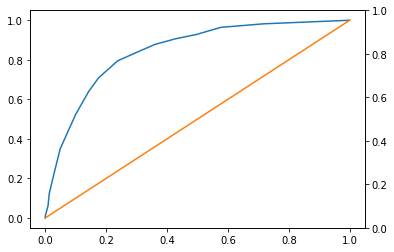

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,roc_curve


knn=KNeighborsClassifier(**rsearch_knn.best_params_)

# done above
knn.fit(X_trains,y_train)
y_train_pred = knn.predict(X_trains)
y_train_prob = knn.predict_proba(X_trains)[:,1]

print('Confusion Matrix - Train: \n', confusion_matrix(y_train, y_train_pred))
print('\n')
print('Overall Accuracy - Train: ', accuracy_score(y_train, y_train_pred))
print('AUC - Train: ', roc_auc_score(y_train, y_train_prob))

y_test_pred = knn.predict(X_tests)
y_test_prob = knn.predict_proba(X_tests)[:,1]

print('\n')
print('Confusion Matrix - Test: \n', confusion_matrix(y_test, y_test_pred))
print('\n')
print('Overall Accuracy - Test: ', accuracy_score(y_test, y_test_pred))
print('Classification Report-Test: \n', classification_report(y_test,y_test_pred))
print('AUC - Test: ', roc_auc_score(y_test, y_test_prob))


fpr,tpr,th=roc_curve(y_test, y_test_prob)
fig,ax=plt.subplots()
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
ax1=ax.twinx()

# Logistic Regression Model

Confusion Matrix - Train: 
 [[1628  179]
 [ 293  361]]


Overall Accuracy - Train:  0.8082080455099553
AUC - Train:  0.8580046336960072


Confusion Matrix - Test: 
 [[699  78]
 [132 146]]


Overall Accuracy - Test:  0.8009478672985783
AUC - Test:  0.8438631334314788


Classification Report-Test: 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87       777
           1       0.65      0.53      0.58       278

    accuracy                           0.80      1055
   macro avg       0.75      0.71      0.73      1055
weighted avg       0.79      0.80      0.79      1055



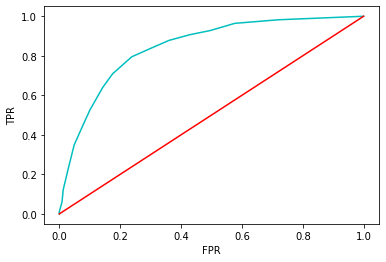

In [31]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver = 'liblinear')

lr.fit(X_trains, y_train)

ytrain_pred = lr.predict(X_trains)
ytrain_prob = lr.predict_proba(X_trains)[:,1]

print('Confusion Matrix - Train: \n', confusion_matrix(y_train, y_train_pred))
print('\n')
print('Overall Accuracy - Train: ', accuracy_score(y_train, y_train_pred))
print('AUC - Train: ', roc_auc_score(y_train, y_train_prob))

ytest_pred = lr.predict(X_tests)
ytest_prob = lr.predict_proba(X_tests)[:,1]

print('\n')
print('Confusion Matrix - Test: \n', confusion_matrix(y_test, y_test_pred))
print('\n')
print('Overall Accuracy - Test: ', accuracy_score(y_test, y_test_pred))
print('AUC - Test: ', roc_auc_score(y_test, y_test_prob))
print('\n')
print('Classification Report-Test: \n', classification_report(y_test, y_test_pred))
    
fpr, tpr, threasholds = roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr, 'c')
plt.plot(fpr, fpr, 'r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

# Stacking results of 3 learners(Random Forest,KNN,Logistic Regression)

# Hard Voting

In [32]:
from sklearn.ensemble import VotingClassifier
lr= LogisticRegression(solver='liblinear')
knn=KNeighborsClassifier(**rsearch_knn.best_params_)
rfc=RandomForestClassifier(**rsearch_rfc.best_params_)

In [33]:
clf=VotingClassifier(estimators=[('lr',lr),('knn',knn),('rfc',rfc)],voting='hard')

clf.fit(X_trains,y_train)

y_train_pred=clf.predict(X_trains)
y_test_pred=clf.predict(X_tests)

print('Accuracy Score-Train:', accuracy_score(y_train, y_train_pred))
print('Accuracy Score-Test:', accuracy_score(y_test, y_test_pred))

Accuracy Score-Train: 0.8122714343762698
Accuracy Score-Test: 0.8132701421800947


# Soft Voting

Confusion Matrix - Train: 
 [[1672  135]
 [ 327  327]]


Overall Accuracy - Train:  0.8122714343762698
AUC - Train:  0.8580046336960072


Confusion Matrix - Test: 
 [[719  58]
 [139 139]]


Overall Accuracy - Test:  0.8132701421800947
AUC - Test:  0.8438631334314788


Classification Report-Test: 
               precision    recall  f1-score   support

           0       0.84      0.93      0.88       777
           1       0.71      0.50      0.59       278

    accuracy                           0.81      1055
   macro avg       0.77      0.71      0.73      1055
weighted avg       0.80      0.81      0.80      1055



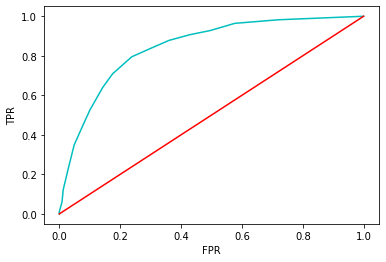

In [34]:
clf=VotingClassifier(estimators=[('lr',lr),('knn',knn),('rfc',rfc)],voting='soft')

clf.fit(X_trains, y_train)

ytrain_pred = clf.predict(X_trains)
ytrain_prob = clf.predict_proba(X_trains)[:,1]

print('Confusion Matrix - Train: \n', confusion_matrix(y_train, y_train_pred))
print('\n')
print('Overall Accuracy - Train: ', accuracy_score(y_train, y_train_pred))
print('AUC - Train: ', roc_auc_score(y_train, y_train_prob))

ytest_pred = clf.predict(X_tests)
ytest_prob = clf.predict_proba(X_tests)[:,1]

print('\n')
print('Confusion Matrix - Test: \n', confusion_matrix(y_test, y_test_pred))
print('\n')
print('Overall Accuracy - Test: ', accuracy_score(y_test, y_test_pred))
print('AUC - Test: ', roc_auc_score(y_test, y_test_prob))
print('\n')
print('Classification Report-Test: \n', classification_report(y_test, y_test_pred))
    
fpr, tpr, threasholds = roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr, 'c')
plt.plot(fpr, fpr, 'r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

# Soft Voting using weightage

Confusion Matrix - Train: 
 [[1672  135]
 [ 327  327]]


Overall Accuracy - Train:  0.8122714343762698
AUC - Train:  0.8580046336960072


Confusion Matrix - Test: 
 [[719  58]
 [139 139]]


Overall Accuracy - Test:  0.8132701421800947
AUC - Test:  0.8438631334314788


Classification Report-Test: 
               precision    recall  f1-score   support

           0       0.84      0.93      0.88       777
           1       0.71      0.50      0.59       278

    accuracy                           0.81      1055
   macro avg       0.77      0.71      0.73      1055
weighted avg       0.80      0.81      0.80      1055



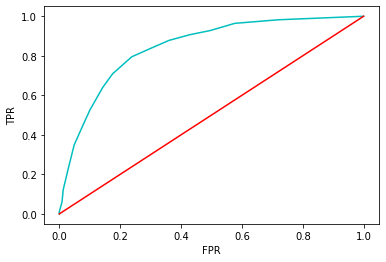

In [35]:
clf=VotingClassifier(estimators=[('lr',lr),('knn',knn),('rfc',rfc)],weights=[1,2,3],voting='soft')

clf.fit(X_trains, y_train)

ytrain_pred = clf.predict(X_trains)
ytrain_prob = clf.predict_proba(X_trains)[:,1]

print('Confusion Matrix - Train: \n', confusion_matrix(y_train, y_train_pred))
print('\n')
print('Overall Accuracy - Train: ', accuracy_score(y_train, y_train_pred))
print('AUC - Train: ', roc_auc_score(y_train, y_train_prob))

ytest_pred = clf.predict(X_tests)
ytest_prob = clf.predict_proba(X_tests)[:,1]

print('\n')
print('Confusion Matrix - Test: \n', confusion_matrix(y_test, y_test_pred))
print('\n')
print('Overall Accuracy - Test: ', accuracy_score(y_test, y_test_pred))
print('AUC - Test: ', roc_auc_score(y_test, y_test_prob))
print('\n')
print('Classification Report-Test: \n', classification_report(y_test, y_test_pred))
    
fpr, tpr, threasholds = roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr, 'c')
plt.plot(fpr, fpr, 'r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()